# IBM Assignment 2

### Importing necessary packages 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [16]:
df=pd.read_csv("Churn_Modelling.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()  

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 1. UNIVARIATE ANALYSIS

### Histogram 

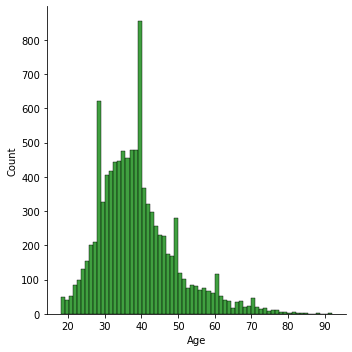

In [25]:
sns.displot(x=df["Age"], color='green')

### Axis Change

<AxesSubplot:xlabel='Count', ylabel='Age'>

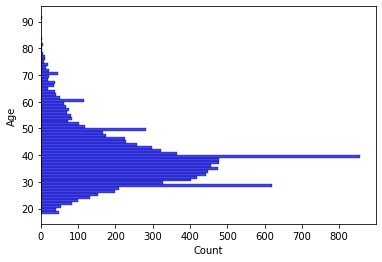

In [20]:
sns.histplot(y=df["Age"],color='blue') 

###Histogram for categorical variables 

<AxesSubplot:xlabel='Age', ylabel='Count'>

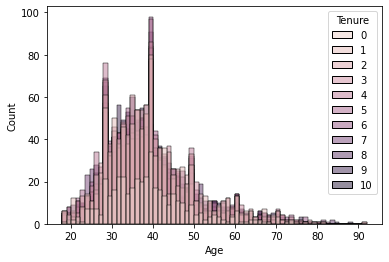

In [54]:
sns.histplot(x=df["Age"],hue=df["Tenure"],color='blue') 

In [23]:
df["Tenure"]

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64

### Distplot 

<AxesSubplot:xlabel='Age', ylabel='Density'>

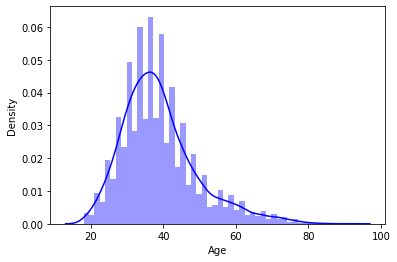

In [11]:
sns.distplot(df["Age"],color='blue') 

<AxesSubplot:xlabel='Age', ylabel='Density'>

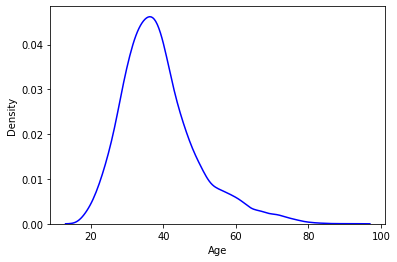

In [12]:
sns.distplot(df["Age"],hist=False,color='blue') 

### Boxplot 

<AxesSubplot:xlabel='Age'>

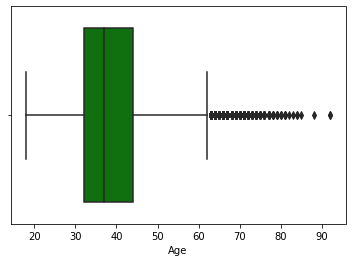

In [27]:
sns.boxplot(x=df["Age"],color='green') 

### Countplot 

<AxesSubplot:ylabel='count'>

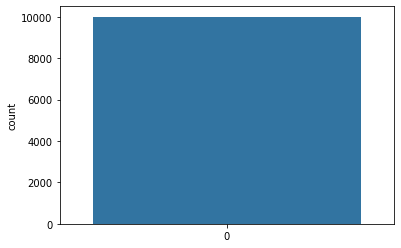

In [14]:
sns.countplot(df['Age']) 

## 2. BIVARIATE ANALYSIS

### Barplot

<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

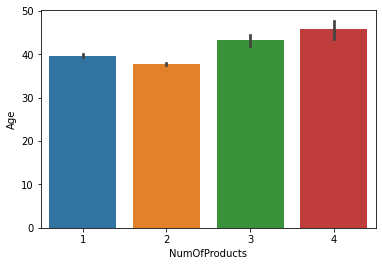

In [30]:
sns.barplot(x=df["NumOfProducts"],y=df["Age"])

### Linearplot

<AxesSubplot:xlabel='Age', ylabel='NumOfProducts'>

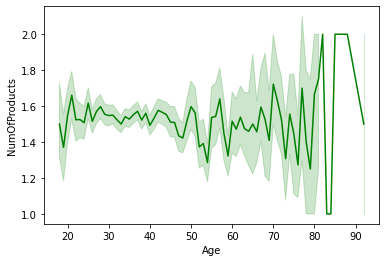

In [31]:
sns.lineplot(x=df["Age"],y=df["NumOfProducts"], color='green')

### Scatterplot

<AxesSubplot:xlabel='Age', ylabel='RowNumber'>

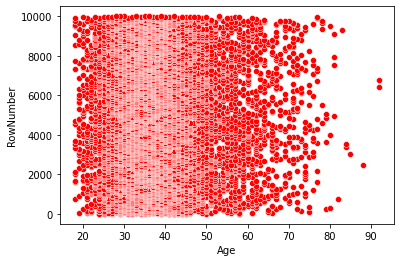

In [32]:
sns.scatterplot(x=df.Age,y=df.RowNumber,color='red')

### Pointplot 

<AxesSubplot:xlabel='Age', ylabel='Tenure'>

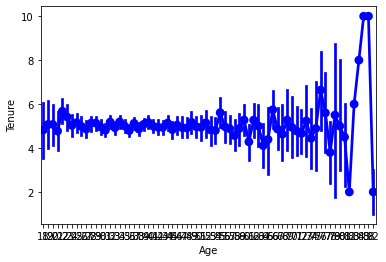

In [33]:
sns.pointplot(x='Age',y='Tenure',data=df,color='blue') 

### Regplot 

<AxesSubplot:xlabel='Age', ylabel='Tenure'>

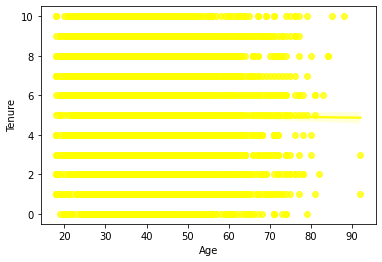

In [35]:
sns.regplot(x=df['Age'],y=df['Tenure'],color='yellow') 

## 3. MULTI - VARIATE ANALYSIS

### Pairplot

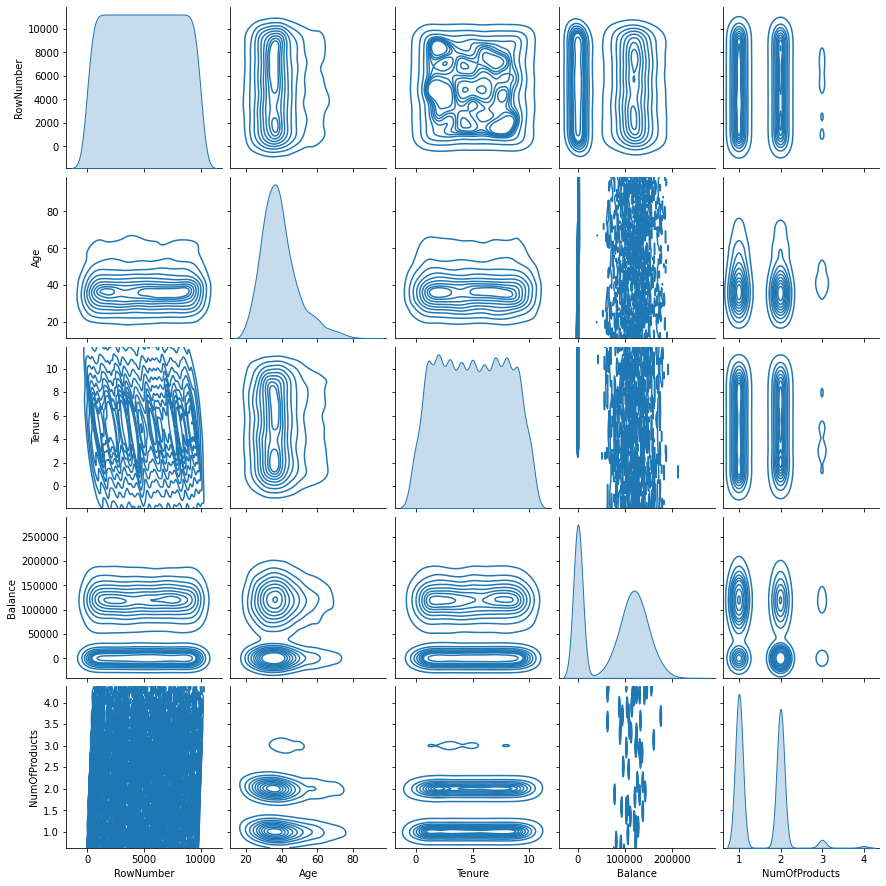

In [36]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]],kind="kde")

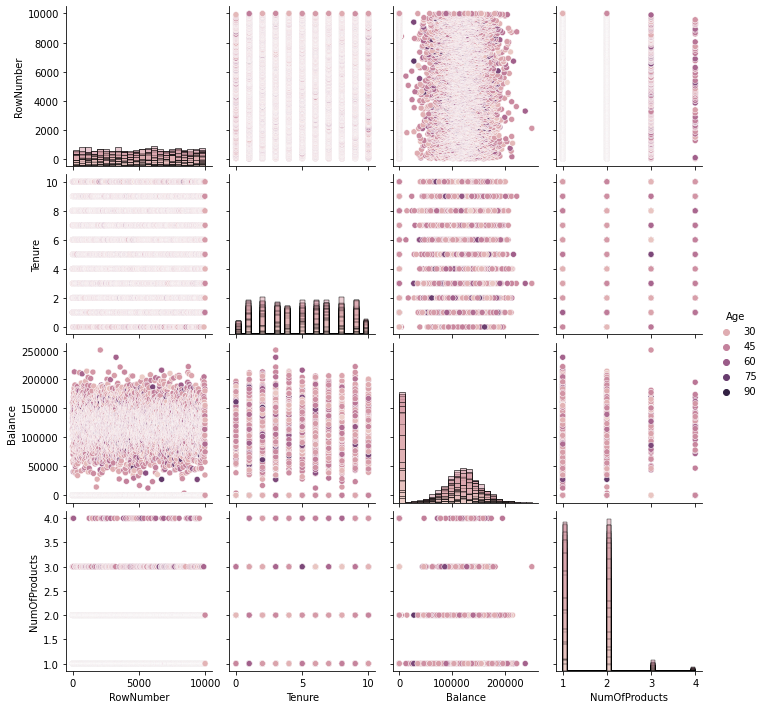

In [37]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]], hue="Age", diag_kind="hist")

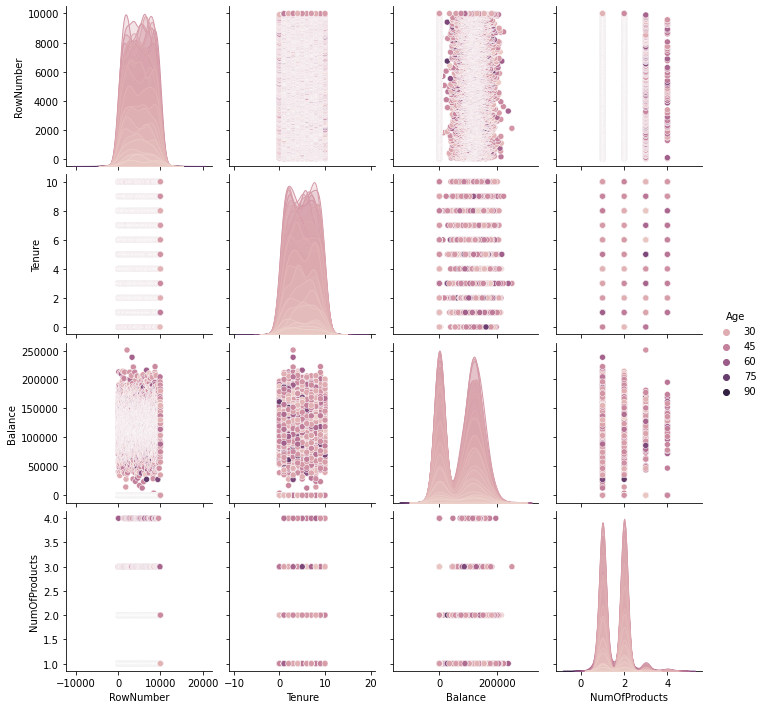

In [38]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]], hue="Age")

## 4. Perform descriptive statistics on the dataset

In [40]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle the Missing values.

In [41]:
# Since the given dataset does not have any null values, another dataset is curated manually.
data=pd.DataFrame({"a":[1,2,np.nan],"b":[1,np.nan,np.nan],"c":[1,2,4]})
data

,a,b,c
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,4


In [50]:
#For all columns, returns true if that columns contains any null value
data.isnull().any()

a     True
b     True
c    False
dtype: bool

In [51]:
#Returns entire df with true and false for null
data.isnull().sum()

a    1
b    2
c    0
dtype: int64

In [49]:
data.isnull().sum()

a    1
b    2
c    0
dtype: int64

In [ ]:
data.fillna(value = "S")

,a,b,c
0,1.0,1.0,1
1,2.0,S,2
2,S,S,4


In [55]:
data["a"].mean()

1.5

In [ ]:
data["a"].median()

1.5

## 6. Find the outliers and replace the outliers

In [57]:
outlierss=df.quantile()

In [58]:
outlierss

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Geography          1.000000e+00
Gender             1.000000e+00
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
Name: 0.5, dtype: float64

In [59]:
qnt = outlierss

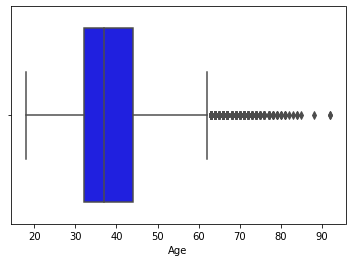

In [ ]:
sns.boxplot(df["Age"],color='blue')

In [63]:
df["Age"]=np.where(df["Age"]<25,50,df["Age"])

<AxesSubplot:>

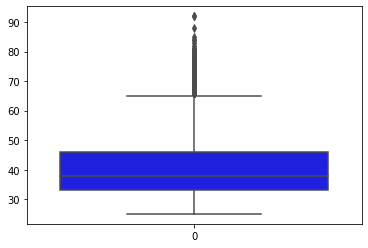

In [64]:
sns.boxplot(df["Age"],color='blue')

## 7. Check for Categorical columns and perform encoding.

In [ ]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [56]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)
df["Geography"].replace({"France":1,"Spain":2,"Germany":3},inplace = True)


In [ ]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0


## 8. Split the data into dependent and independent variables.

In [ ]:
y = df["Surname"]

In [ ]:
x=df.drop(columns=["Surname"],axis=1)

In [ ]:
x.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## 9. Scale the independent variables

In [ ]:
names=x.columns
names

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
X=scale(x)

In [ ]:
X

array([[-1.73187761, -0.78321342, -0.32622142, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-1.7315312 , -0.60653412, -0.44003595, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.73118479, -0.99588476, -1.53679418, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.7315312 , -0.11935577,  1.25683526, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.73187761, -0.87055909,  1.46377078, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [ ]:
x = pd.DataFrame(X,columns = names )
x

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.326221,-0.902587,-1.095988,0.179622,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,-0.440036,0.301665,-1.095988,0.080092,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,-1.536794,-0.902587,-1.095988,0.179622,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,0.501521,-0.902587,-1.095988,-0.118968,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,2.063884,0.301665,-1.095988,0.279152,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,-0.902587,0.912419,-0.118968,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,1.730838,-1.682806,-1.391939,-0.902587,0.912419,-0.517088,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,1.731185,-1.479282,0.604988,-0.902587,-1.095988,-0.417558,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.731531,-0.119356,1.256835,1.505917,0.912419,0.179622,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


## 10. Split the data into training and testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,0.827747,-0.195066,0.170424,0.301665,-1.095988,-0.616618,-0.004426,-1.225848,0.807737,0.646092,-1.030670,1.108382,-0.505775
9275,1.481077,0.810821,-2.312802,1.505917,0.912419,0.179622,-1.387538,-0.012892,-0.911583,0.646092,0.970243,-0.747592,-0.505775
2995,-0.694379,-1.507642,-1.195351,-0.902587,-1.095988,-1.114268,-1.041760,0.575076,-0.911583,0.646092,-1.030670,1.487464,-0.505775
5316,0.109639,1.243462,0.035916,0.301665,0.912419,-0.019438,-0.004426,0.467955,-0.911583,0.646092,-1.030670,1.278558,-0.505775
356,-1.608556,-1.100775,2.063884,0.301665,-1.095988,1.672571,1.032908,0.806010,0.807737,0.646092,0.970243,0.560069,-0.505775


In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 13), (8000,), (2000, 13), (2000,))